## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [3]:
data = pd.read_excel(r"C:\Users\DERIC JOSE\Downloads\iris (2).xls")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

## Checking for null values

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
for i in ["SL", "SW","PL"]:
    data[i]= data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### As our target variable is Classification column which is of object data type we need to convert it to integer. Thus label Encoding is done on Classification column.



### Label Encoding on Classification

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
data["Classification"] = le.fit_transform(data["Classification"])

In [14]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


### Finding Correlation

In [15]:
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.099107,0.830554,0.800939,0.774077
SW,-0.099107,1.000000,-0.405531,-0.338655,-0.403796
PL,0.830554,-0.405531,1.000000,0.936089,0.927509
PW,0.800939,-0.338655,0.936089,1.000000,0.956464
Classification,0.774077,-0.403796,0.927509,0.956464,1.000000


<AxesSubplot:>

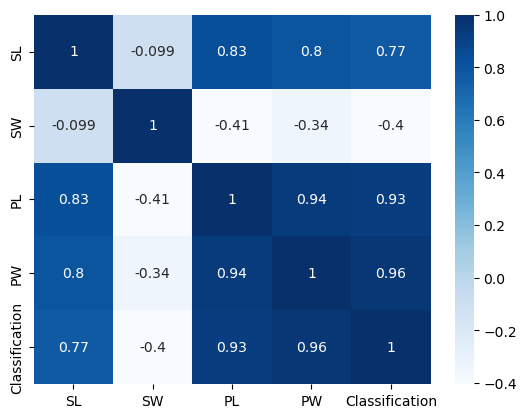

In [16]:
sns.heatmap(data.corr(),annot=True, cmap="Blues")

In [17]:
#class_data1 = class_data.drop("SW", axis=True)

In [18]:
#sns.heatmap(class_data1.corr(),annot=True, cmap="Blues")

# Classification

### 1) Logistic Regression Model

In [19]:
y = data["Classification"]
X = data.drop("Classification", axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [21]:
log_model =  lr.fit(X_train, y_train)
log_pred  = log_model.predict(X_test)
log_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
confusion_matrix(y_test, log_pred)
accuracy_score(y_test, log_pred)

0.9736842105263158

### 2) kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(X_train,y_train)
    knn_pred  =  knn_model.predict(X_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [25]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

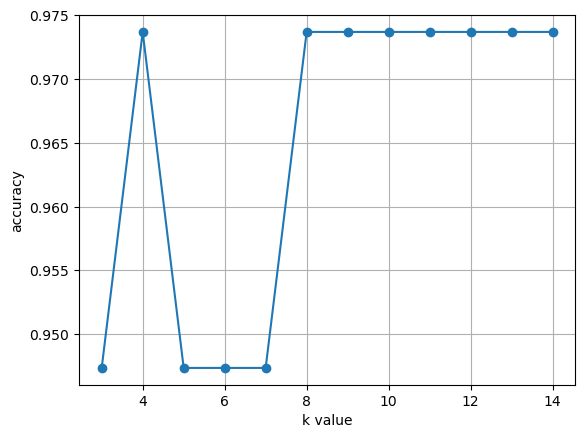

In [26]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [27]:
knn_4       =  KNeighborsClassifier(n_neighbors = 4)
knn_model_4 =  knn_4.fit(X_train,y_train)
knn_pred_4  =  knn_model_4.predict(X_test)
knn_pred_4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [28]:
knn_8       =  KNeighborsClassifier(n_neighbors = 8)
knn_model_8 =  knn_8.fit(X_train,y_train)
knn_pred_8  =  knn_model_8.predict(X_test)
knn_pred_8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [29]:
confusion_matrix(y_test, knn_pred)
accuracy_score(y_test, knn_pred)

0.9736842105263158

## 3) SVM

In [30]:
from sklearn.svm import SVC

In [31]:
# svm kernel rbf

svm_1       = SVC(kernel = "rbf")
svm_model_1 = svm_1.fit(X_train, y_train)
svm_pred_1  = svm_model_1.predict(X_test)

In [32]:
confusion_matrix(y_test, svm_pred_1)
accuracy_score(y_test, svm_pred_1)

0.9736842105263158

In [33]:
# svm kernel poly

svm_2       = SVC(kernel = "poly")
svm_model_2 = svm_2.fit(X_train, y_train)
svm_pred_2  = svm_model_2.predict(X_test)

In [34]:
confusion_matrix(y_test, svm_pred_2)
accuracy_score(y_test, svm_pred_2)

0.9736842105263158

In [35]:
# svm kernel linear

svm_3       = SVC(kernel = "linear")
svm_model_3 = svm_2.fit(X_train, y_train)
svm_pred_3  = svm_model_2.predict(X_test)

In [36]:
confusion_matrix(y_test, svm_pred_3)
accuracy_score(y_test, svm_pred_3)

0.9736842105263158

## 4) Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier 

dt       = DecisionTreeClassifier(random_state = 42)
dt_model = dt.fit(X_train, y_train)
dt_pred  = dt_model.predict(X_test)
dt_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [38]:
confusion_matrix(y_test, dt_pred)
accuracy_score(y_test, dt_pred)

1.0

## 5) Random Forest model

In [39]:
from sklearn.ensemble import RandomForestClassifier 

rf       = RandomForestClassifier(random_state = 42)
rf_model = rf.fit(X_train, y_train)
rf_pred  = rf_model.predict(X_test)
rf_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [40]:
confusion_matrix(y_test, rf_pred)
accuracy_score(y_test, rf_pred)

1.0

The accuracy using each of the models are:

1.Logistic regression = 97%

2.kNN model = 97%

3.SVM (kernal = rbf) = 97%

4.SVM (kernal = poly) = 97%

5.SVM (kernal = linear) = 97%

6.Decision tree model = 100%

7.random forest model = 100%

Thus from the above data we could conclude that the best model for classifying iris dataset is using either decision tree or random forest model as it is having the highest accuracy of 100%.